In [1]:
from sage.graphs.graph import Graph
from sage.graphs.independent_sets import IndependentSets

# Python Visualization/Calculation libraries
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Caching
from functools import lru_cache

In [120]:
def perfect_binary_tree_generator(n):
    if n == 0:
        return Graph()
    else:
        g = Graph()

        g.add_vertices([2^n])
        
        for j in range(2^(n - 1) - 1, 2^(n - 1) + n - 1):
             g.add_edge(j, 2*j + 1, f'{j} to {2*j + 1}')
            
        for i in range(2^n - 1):
            g.add_edge(i, 2*i + 1,  f'{i} to {2*i + 1}')
            g.add_edge(i, 2*i + 2, f'{i} to {2*i + 1}')
            
        for j in range(2^(n-1) - 1, 2^n - 1):
            g.add_edge(j, 2*j + 1,  f'{j} to {2*j + 1}')
            
        return g
    
# NOTE: This is only for the perfect binary trees. This will not hold for the counter example of lobster graph
def get_leaves(n):
    num_vertices = 2^(n + 1) - 1 # Adding one to adjust for the 0-indexing
    leaves = []
    last_row_start = floor(num_vertices / 2)
    
    for vertex in range(last_row_start, num_vertices):
        leaves.append(vertex)
    
    return leaves

In [128]:
def counter_example_generator_false(n):
    if n == 0:
        return Graph()
    else:
        g = Graph()
#         For the counter example, the last row will have half as less leaves ie. 2d / 2 = d. 
#         Hence, we add the number of vertices until the second last row and d
        num_vertices = 2^(n - 1) + n - 1
        g.add_vertices([num_vertices])
        
#         This is to generate the counter example tree
        second_last_depth_num = 2^(n - 1) - 1
        last_depth_num = 2^(n - 1) # This is correctly add the index as one leaf instead of two for the final depth

        for i in range(second_last_depth_num):
            g.add_edge(i, 2*i + 1, f'{i} to {2*i + 1}')
            g.add_edge(i, 2*i + 2, f'{i} to {2*i + 2}')
            
        for j in range(second_last_depth_num + 1):
            g.add_edge(second_last_depth_num + j, second_last_depth_num + j + last_depth_num)
        
        return g

In [154]:
def counter_example_generator_true(n):
    if n == 0:
        return Graph()
    else:
#        For now, I'm hardcoding this. Change this into a more formula based thing later on
        graph_vert_edge = {
            0: [1, 2],
            1: [3, 4, 5],
            2: [6, 7, 8],
            3: [9],
            4: [10],
            5: [11],
            6: [12],
            7: [13],
            8: [14, 15],
        }
        g = Graph(graph_vert_edge)
    
        
        return g

In [155]:
depth = 3 # Note that the depth defined here is actually depth - 1 because we are 0-indexing

# tree = perfect_binary_tree_generator(depth)
# tree = counter_example_generator_false(depth)
tree = counter_example_generator_true(depth)
print(tree.order())
leaves = get_leaves(depth)
leaves

16


[7, 8, 9, 10, 11, 12, 13, 14]

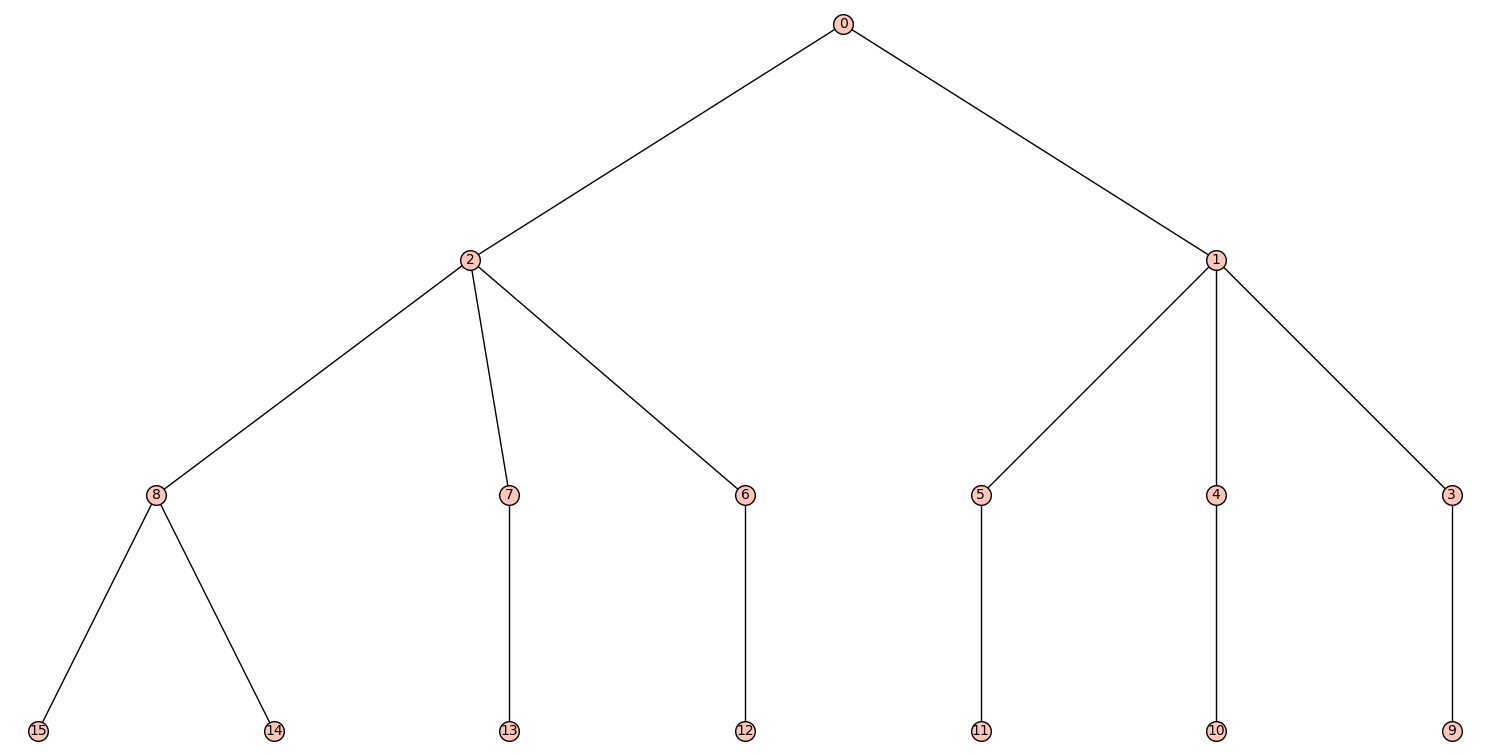

In [156]:
def perfect_binary_tree_plot():
#     tree.plot()
#     tree.show()
    tree_layout = tree.layout(layout='tree', orientation='bottom-top')
    tree.show(layout="tree", tree_root=0, figsize=[15, 15]) # 8x8 inches

perfect_binary_tree_plot()

In [157]:
def is_rooted_at(v, arr):
#     print(f'This is the leaf: {v}')
    return list(i for i in arr if v in i)

def get_num_vertices(depth):
    return pow(depth + 1, 2) - 1

In [158]:
alpha = tree.independent_set() # I think this shows the maximal. Doc: https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph.html#sage.graphs.graph.Graph.independent_set
cardinality_alpha = len(alpha)
print(alpha)
cardinality_alpha

[1, 2, 9, 10, 11, 12, 13, 14, 15]


9

In [159]:
def get_max_num(depth):
    tree = perfect_binary_tree_generator(depth)
    max_independent_set = tree.independent_set()
    print(f"Depth: {depth}, Num of vertices: {2^(depth + 1) - 1} , Alpha: {len(max_independent_set)} \n")

In [160]:
@lru_cache(maxsize=None) # Unlimited cache size
def specific_coclique_size(n):
    is_n = (x for x in IndependentSets(tree) if len(x) == n)
    is_n = list(is_n)

    return is_n

In [161]:

# # Use this cell to generate large amounts of cocliques and then the specific_coclique_size function will be cached

coclique_sizes = np.array(range(1, len(alpha) + 1))
cocliques = np.asarray(list(specific_coclique_size(i) for i in coclique_sizes), dtype="object")
# Shape: 3 Dimensional array. The first index is the size of the coclique, the second index is the index of the size of the coclique
# cocliques[5] # This will give you a 2D array of all cocliques of size 5

In [149]:
test = specific_coclique_size(7)
print(len(test))
print(tree.order())

86
15


In [150]:
def plot_coclique_vertices_size(curr_coclique_size: int):
    tree_vertices = np.array(range(get_num_vertices(depth)))
    print(tree_vertices)
    curr_coclique = specific_coclique_size(40) # Get cocliques of size curr_coclique_size
    
    coclique_vertices = [vertex for coclique in curr_coclique for vertex in coclique]

    # Count the occurrences of each vertex in the cocliques
    vertex_counts = Counter(coclique_vertices)

    # Get the count of each vertex in tree_vertices, which will be 0 for vertices that do not appear in the cocliques
    vertex_counts = [vertex_counts.get(vertex, 0) for vertex in tree_vertices]

    plt.plot(tree_vertices, vertex_counts)
    plt.xlabel("Vertices")
    plt.ylabel("Frequence of Appearance")
    plt.ylim(bottom=0) 
    plt.title(f"Coclique size of {curr_coclique_size}")
    plt.show()

In [151]:
def plot_coclique_vertices_size(curr_coclique_size: int):
    tree_vertices = np.array(range(tree.order()))
    print(tree_vertices)
    curr_coclique = cocliques[curr_coclique_size - 1] # Get cocliques of size curr_coclique_size
    
    coclique_vertices = [vertex for coclique in curr_coclique for vertex in coclique]

    # Count the occurrences of each vertex in the cocliques
    vertex_counts = Counter(coclique_vertices)

    # Get the count of each vertex in tree_vertices, which will be 0 for vertices that do not appear in the cocliques
    vertex_counts = [vertex_counts.get(vertex, 0) for vertex in tree_vertices]

    plt.plot(tree_vertices, vertex_counts)
    plt.xlabel("Vertices")
    plt.ylabel("Frequence of Appearance")
    plt.ylim(bottom=0) 
    plt.title(f"Coclique size of {curr_coclique_size}")
    plt.savefig(f"size_{curr_coclique_size}.png", bbox_inches='tight')
    plt.show()


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


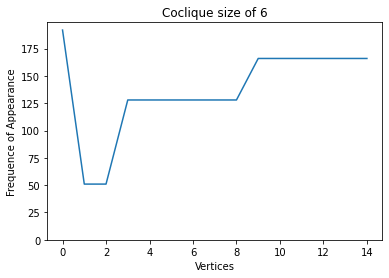

In [152]:
plot_coclique_vertices_size(6)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


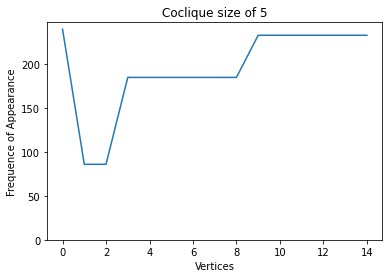

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


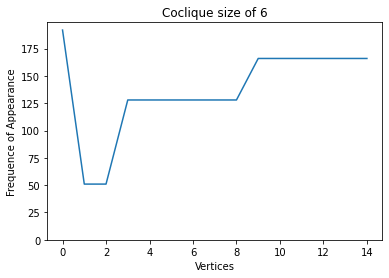

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


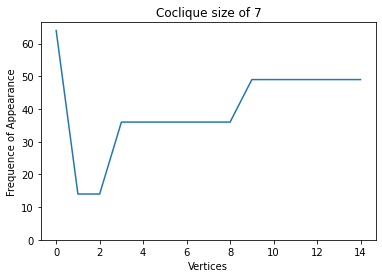

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


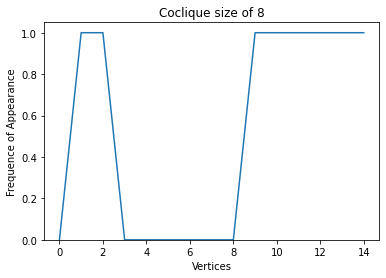

In [153]:
for i in range(5, cardinality_alpha + 1):
    plot_coclique_vertices_size(i)